In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data_set = pd.read_csv("C:/Sefkan/column_2C_weka.csv")
data_set

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


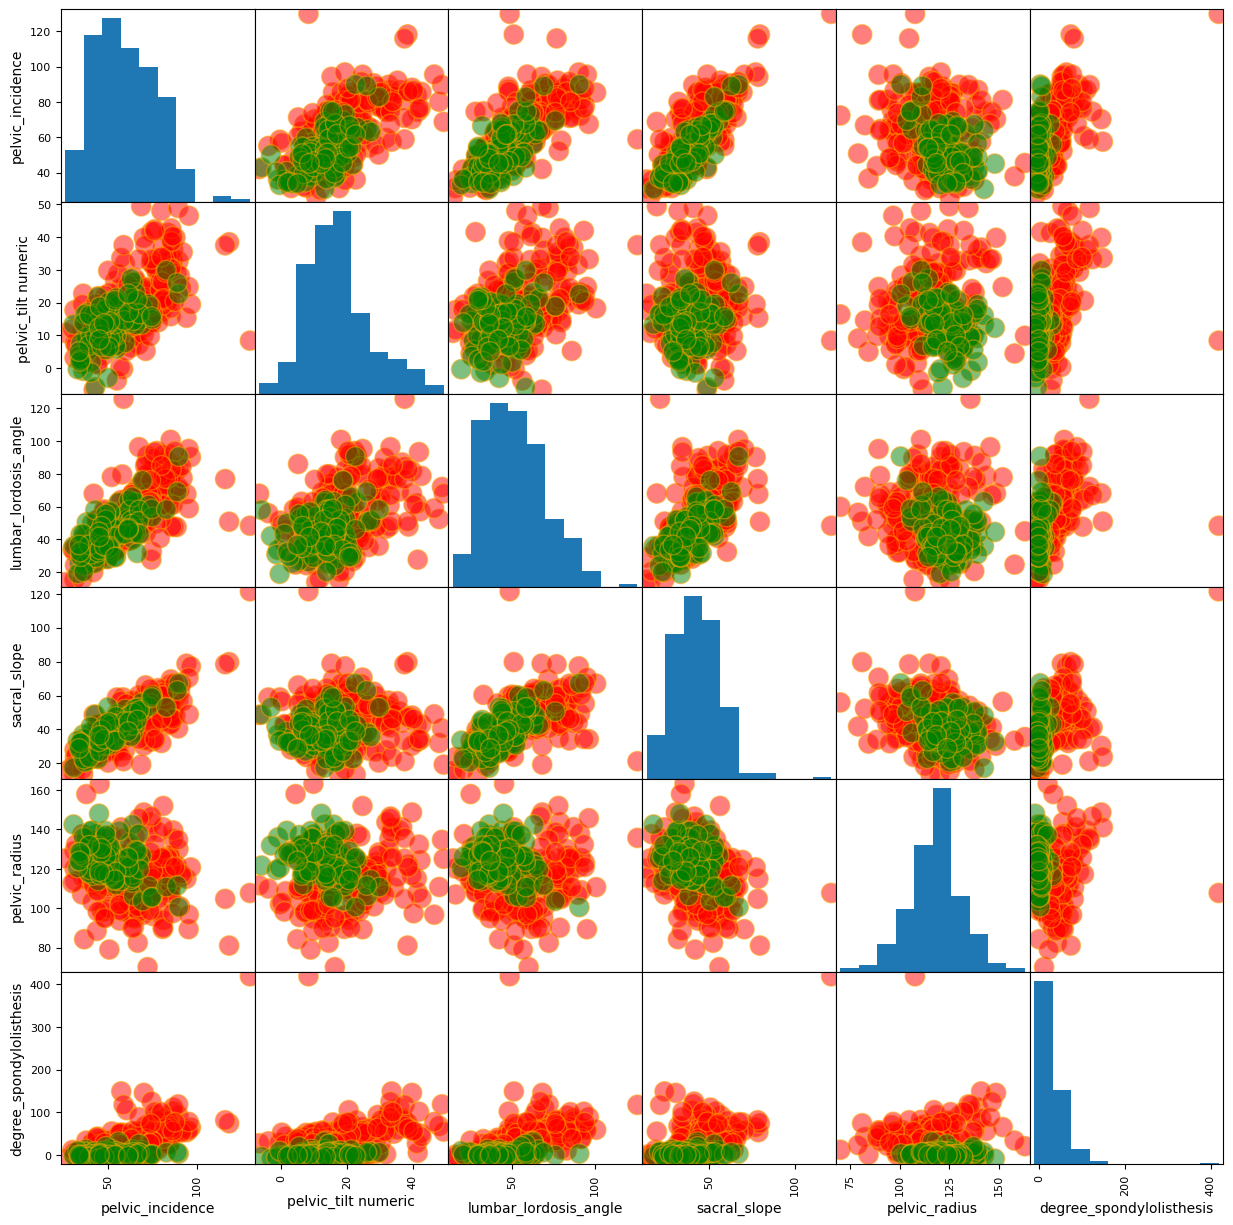

In [2]:
color_list = ['red' if i=='Abnormal' else 'green' for i in data_set.loc[:,'class']]
pd.plotting.scatter_matrix(data_set.loc[:, data_set.columns != 'class'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = '?',
                                       edgecolor= "orange")

plt.show()

Abnormal    210
Normal      100
Name: class, dtype: int64

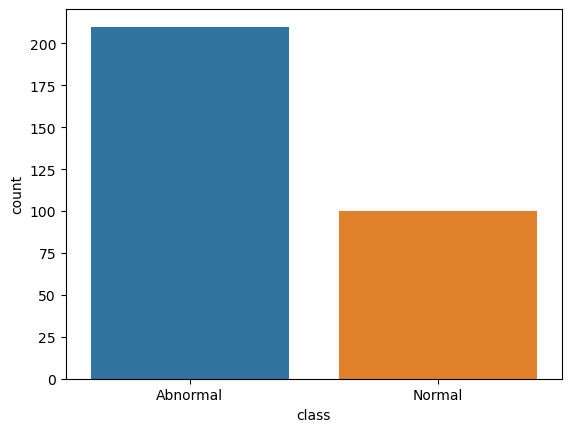

In [3]:
import seaborn as sns

sns.countplot(x="class",data = data_set)
data_set.loc[:,"class"].value_counts()

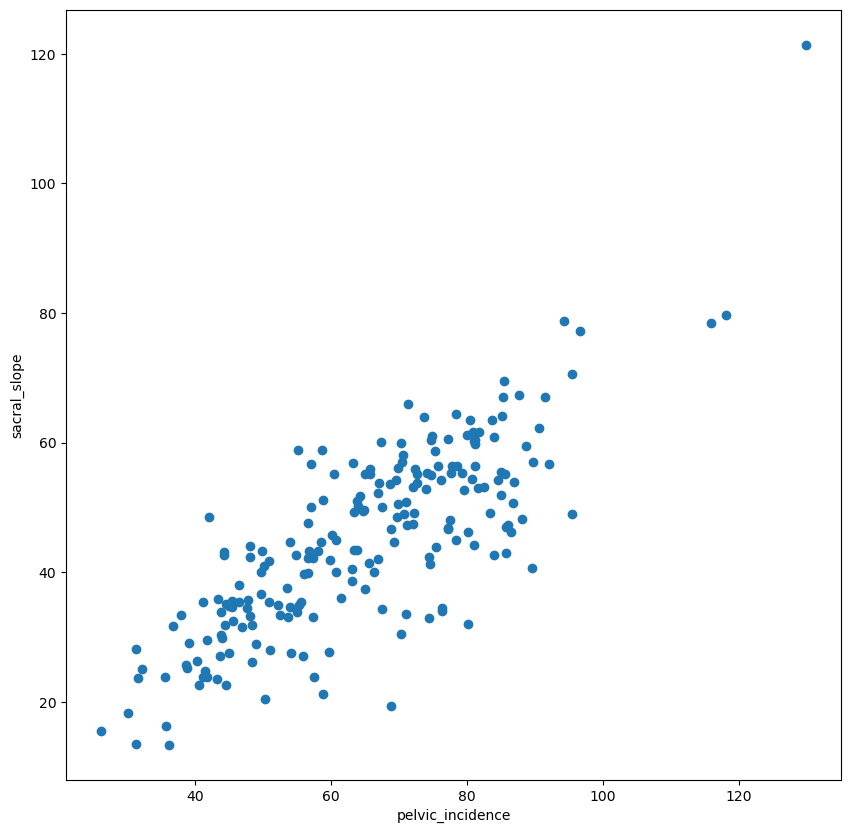

In [4]:
data1 = data_set[data_set["class"]=="Abnormal"]
x = np.array(data1.loc[:,"pelvic_incidence"]).reshape(-1,1)
y = np.array(data1.loc[:,"sacral_slope"]).reshape(-1,1)

plt.figure(figsize=[10,10])
plt.scatter(x,y)
plt.xlabel("pelvic_incidence")
plt.ylabel("sacral_slope")
plt.show()

R^2 score:  0.6458410481075871


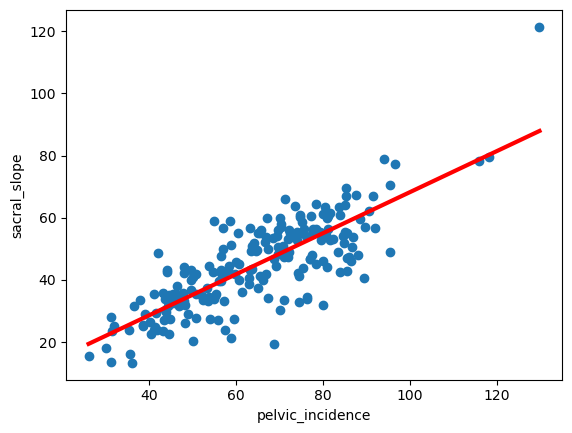

In [7]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
predict_space = np.linspace(min(x), max(x)).reshape(-1,1)
linear_regression.fit(x,y)

predicted = linear_regression.predict(predict_space)
print("R^2 score: ",linear_regression.score(x, y))
plt.plot(predict_space, predicted, color="red", linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel("pelvic_incidence")
plt.ylabel("sacral_slope")
plt.show()